Ultralytics Yolo v3 설치

In [1]:
!git clone https://github.com/ultralytics/yolov3.git

Cloning into 'yolov3'...
remote: Enumerating objects: 10017, done.
remote: Total 10017 (delta 0), reused 0 (delta 0), pack-reused 10017
Receiving objects: 100% (10017/10017), 9.33 MiB | 22.92 MiB/s, done.
Resolving deltas: 100% (6758/6758), done.


In [2]:
!cd yolov3;pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 5.3 MB/s 
     |████████████████████████████████| 1.8 MB 40.8 MB/s 
     |████████████████████████████████| 145 kB 55.3 MB/s 
     |████████████████████████████████| 181 kB 51.9 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 


image Detection

In [3]:
# yolyv3 디렉토리 안의 test image detection 수행
# --project를 설정하지 않으면 자동으로 runs/detect/exp로 detect된 결과가 저장됨.(2번째 수행하면 exp2 디렉토리가 생성됨. 
# coco로 pretrained된 yolov3.pt weight가 없으면 자동으로 download함. 
!cd yolov3;python detect.py --weight yolov3.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-18-g0aa65ef torch 1.11.0+cu113 CPU

100% 119M/119M [00:03<00:00, 35.8MB/s]

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bicycle, 1 bus, Done. (2.430s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (1.732s)
Speed: 2.2ms pre-process, 2080.9ms inference, 8.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


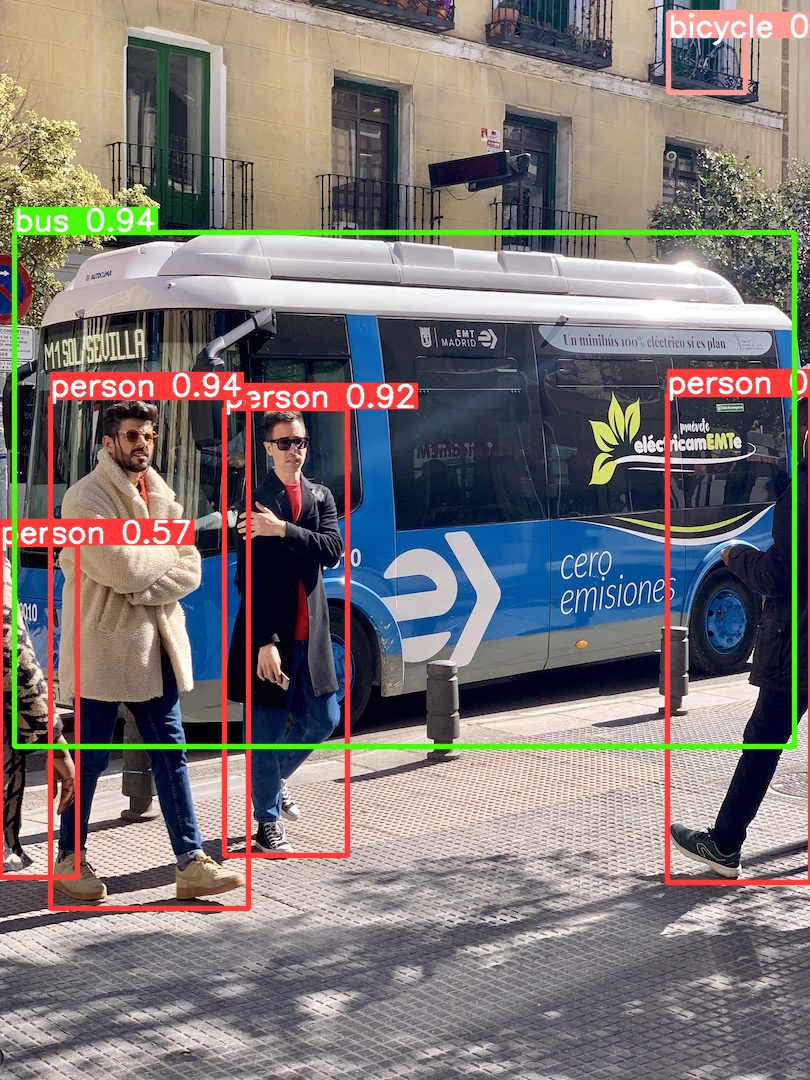

In [4]:
from IPython.display import Image
Image(filename="/content/yolov3/runs/detect/exp/bus.jpg",width=600)

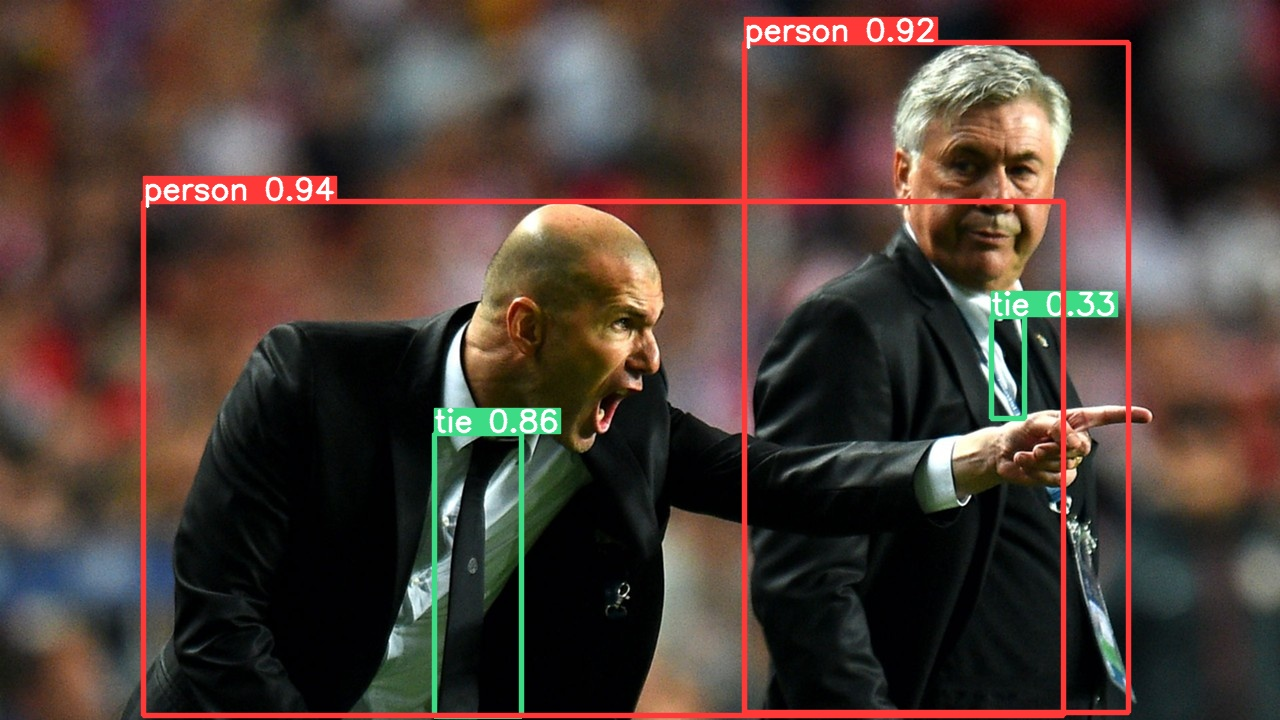

In [5]:
from IPython.display import Image
Image(filename="/content/yolov3/runs/detect/exp/zidane.jpg",width=600)

In [6]:
!mkdir ./data

In [10]:
!mkdir ./images
!wget -O ./images/street.png https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/street.png

mkdir: cannot create directory ‘./images’: File exists
--2022-06-21 02:42:59--  https://raw.githubusercontent.com/HyeBin-Hub/Lesson-Object_Detection/main/images/street.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 730971 (714K) [image/png]
Saving to: ‘./images/street.png’

./images/street.png 100%[===================>] 713.84K  --.-KB/s    in 0.03s   

2022-06-21 02:43:00 (20.7 MB/s) - ‘./images/street.png’ saved [730971/730971]



In [12]:
!cd yolov3;python detect.py --weight yolov3.pt --img 640 --conf 0.25 \
                            --project /content/data --name=run_img --exist-ok --line-thickness 1 \
                            --source /content/images/street.png

detect: weights=['yolov3.pt'], source=/content/images/street.png, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data, name=run_img, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-18-g0aa65ef torch 1.11.0+cu113 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
image 1/1 /content/images/street.png: 352x640 2 persons, 14 cars, 1 truck, 2 traffic lights, Done. (1.625s)
Speed: 1.3ms pre-process, 1625.4ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/run_img


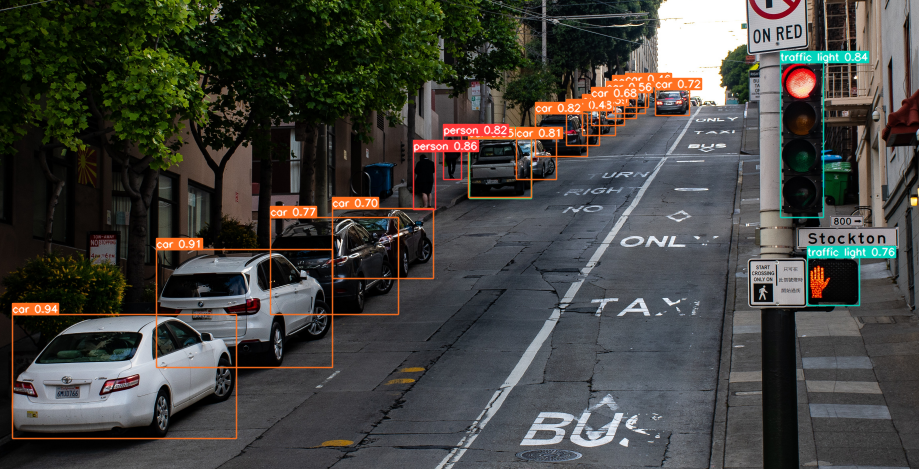

In [13]:
from IPython.display import Image

Image(filename="/content/data/run_img/street.png",width=600)

Video Detection

In [14]:
!wget -O /content/data/Night_Day_Chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true

--2022-06-21 02:44:35--  https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4 [following]
--2022-06-21 02:44:35--  https://github.com/chulminkw/DLCV/raw/master/data/video/Night_Day_Chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4 [following]
--2022-06-21 02:44:36--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/Night_Day_Chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [16]:
!cd yolov3;python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source /content/data/Night_Day_Chase.mp4 \
                            --project=/content/data/run_video --exist-ok --line-thickness 1

detect: weights=['yolov3.pt'], source=/content/data/Night_Day_Chase.mp4, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/run_video, name=exp, exist_ok=True, line_thickness=1, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-18-g0aa65ef torch 1.11.0+cu113 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients
video 1/1 (1/480) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (1.282s)
video 1/1 (2/480) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (1.287s)
video 1/1 (3/480) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (1.282s)
video 1/1 (4/480) /content/data/Night_Day_Chase.mp4: 288x640 1 person, 1 motorcycle, Done. (1.277s)
video 1/1 (5/480) /content/da